# Data Science Methods for Clean Energy Research 
## _Support Vector Machines_

## Outline


### 1. Maximal margin classifier

### 2. Support vector classifier

### 3. Support vector machine





---







### Load libraries which will be needed in this Notebook



In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for decision tree models
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC, LinearSVC

import sv_utils as sv

# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})
from IPython.display import clear_output
from matplotlib import cm

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


## What are SVM methods?

SVM methods are used for classification. They are based on the idea of defining classes based on a separating **hyperplane**

Hyperplanes in a $p$ dimensional space are defined as 

$$\beta_0+\beta_1X_1 + ...+\beta_pX_p=0$$

So in two dimensions the equation is 

$$\beta_0 + \beta_1X_1 +\beta_2X_2 =0  $$

which is simply the equation of a line in the $X_1,X_2$ space


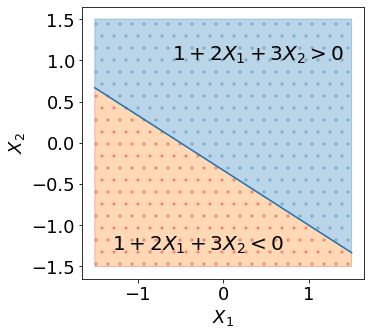

In [2]:
sv.my_special_margin_plot()

We can define whether a point lies in one class or an other depending on the sign of the equation - i.e. depending on which side of the plane it lies on:

Blue class:
$$\beta_0+\beta_1X_1 + ...+\beta_pX_p>0$$
or

Orange class:
$$\beta_0+\beta_1X_1 + ...+\beta_pX_p<0$$

In 3 dimensions, the hyperplane would be a two dimensional surface and so on.

The hyperplane is our **decision boundary**.

Now, how do we define and find this hyperplane?

## 1. Maximal Margin Classifier

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width='300' align=left>
</div>

Here the margin is equal to 1.

How to find the hyperplane:

* Compute the perpendicular distance from each training obervation $x^*$ to a given separating hyperplane which is a multiple linear function
$$f(x^*)=\beta_0+\beta_1x_1^*+...+\beta_px_p^*$$
    * Compute the distance as the dot product between $f(x^*)$ and $y^*$
 
* Sort these distances - the smallest distance is the *margin*, M
* Repeat for a new set of values of parameters $\beta$ and choose our hyperplane (i.e. the values of $\beta_i$) as the one that has the largest margin

   * Note: We constrain $\sum_{j=1}^{p}\beta_j^2=1$ and $M > 0$
   
This is a so called **hard margin** as we assume that a separating hyperplane exists and that there is a solution with $M>0$

Let's create some data to be classified

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.7)

and split it into a train and a test set

In [4]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

what does this look like?

In [5]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["mediumslateblue","mediumturquoise","coral"])

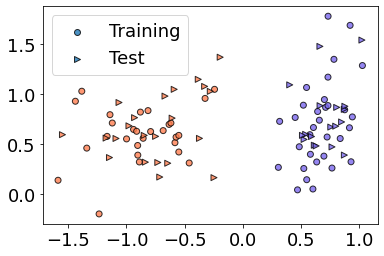

In [6]:
plt.figure()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=my_cmap, alpha=0.8,
           edgecolors='k', label='Training')

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='>', 
            c=y_test, cmap=my_cmap, alpha=0.8,
           edgecolors='k', label='Test')

plt.legend()
plt.show()

We will use the `sklearn` SVC [function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to find the hyperplane which divides this data into two classes.

In [7]:
from sklearn.svm import SVC
print(X_train.shape)
clf = SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print("Score: ", score)
print("Accuracy score:", accuracy_score(y_test,clf.predict(X_test)))

(60, 2)
Score:  1.0
Accuracy score: 1.0


Let's have a look at the decision boundary in a plot

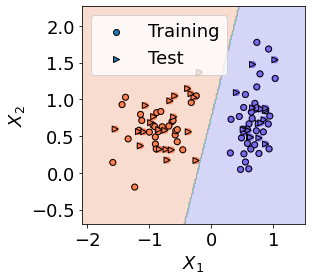

In [8]:
fig, ax = plt.subplots(figsize=(4,4))

h=0.02
delt=0.5

xx, yy = sv.make_meshgrid(X[:,0], X[:,1], h, delt)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.3)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=my_cmap,
           edgecolors='k', marker='o', label='Training')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=my_cmap,
           edgecolors='k', marker='>', label='Test')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()


Luckily, this dataset has two distinct groups, so separating the two with a line is pretty simple. However, that's not always the case. This method would fall apart if there was any overlap. 

What happens when there is **no separable boundary**?

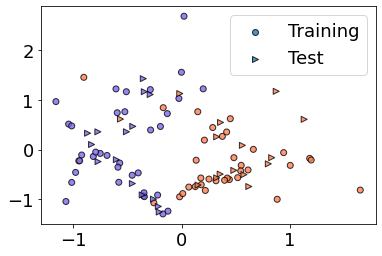

In [9]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2, class_sep=0.5)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

plt.figure()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=my_cmap, alpha=0.8,
           edgecolors='k', label='Training')

# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='>', 
            c=y_test, cmap=my_cmap, alpha=0.8,
           edgecolors='k', label='Test')

plt.legend()
plt.show()

## 2. Support vector classifier

The concept of the separable hard decision boundary is generalized to the non-separable case - we allow hyperplanes which **do not** perfectly separate the two (or more) classes - sometimes referred to as a soft margin. 

* Some points will be incorrectly classified but overall we will get a better classification of most of the training points.


<div>
<img src="https://miro.medium.com/max/552/1*CD08yESKvYgyM7pJhCnQeQ.png" width='500' align=left>
</div>

How do we find the soft margin hyperplane?

In the previous case our optimization problem was 
$$y_i\cdot f(x_i)=y_i\cdot(\beta_0+\beta_1x_{i,1}+...+\beta_px_{i,p})\geq M$$

with $M> 0$  and $\sum_j\beta_j^2=1$ 

Now we soften the margin by introducing **slack variables** $\epsilon_i$

$$y_i\cdot f(x_i)=y_i\cdot(\beta_0+\beta_1x_{i,1}+...+\beta_px_{i,p})\geq M(1-\epsilon_i)$$

with $\epsilon_i\geq0$ and $\sum_{i=1}^{n}\epsilon_i\leq C$ with $C$ a non negative tuning parameter.

Just as we did previously, we aim to find the large margin $M$. Note thtat now we have more variables to determine, beyond the $\beta_i$ we have $\epsilon_i$ parameters.

The C parameter represents the “budget” for the amount of points that can violate the decision boundary during training as C increases, the extent of allowed violations increases. We can think of C as our bias/variance tradeoff parameter.

* If C=0 we are in the case of the hard margin
* If C is large we have a small margin
* If C is small we have a large margin
* Observations that lie directly on the margin or on the wrong side of the margin for their class are known as support vectors

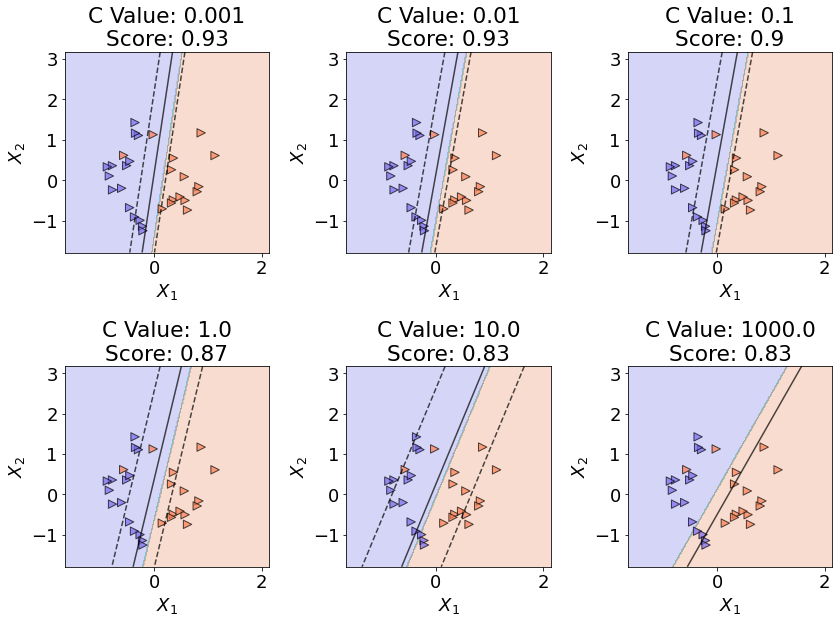

In [10]:
C_values = [ 1000, 100, 10, 1, 0.1, 0.001]

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

axes = [item for sublist in axes for item in sublist]

xx, yy = sv.make_meshgrid(X[:,0], X[:,1], h, delt)

for C, ax in zip(C_values, axes):
    
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary areas. 
    _, Z = sv.plot_decision_contours(ax, clf, xx, yy, cmap=my_cmap, alpha=0.3)
    
    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])
    
    # Plot the training points
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    #           edgecolors='k', label='Training')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=my_cmap,
                edgecolors='k', marker='>', s=70, alpha=0.7, label='Test')

    # ax.legend(loc="upper center")
    ax.set_title('C Value: '+str(1./C)+'\nScore: '+str(round(score,2)))

    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    
plt.tight_layout()

## 3. Support Vector Machines

Can we do anything better than a simple linear boundary? With KNN we were able to capture non linear decision boundaries .. 

We can do the same thing with Support Vector Machines!

SVMs really get their power when you take advantage of something called a kernel. A kernel takes your original dataset, transforms it into higher dimensional space, and then draws a hyperplane in that new hyperdimensional space. Such hyperplane is linear in the hyperdimensional space but it **becomes non linear** in the original predictor space. It's a lot of math that we won't go into here. But let's see what happens when we try to classify some data with a radial kernel.

In [ ]:
from sklearn.datasets import make_circles

# Create data arranged in a circular pattern
data = make_circles(noise=0.2, factor=0.5, random_state=1)
X, y = data

# Split in train and test set
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

# Fit an SVC classifier using a linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)



In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
xx, yy = sv.make_meshgrid(X[:,0], X[:,1], h, delt)

figure, ax = plt.subplots(figsize=(4,4))
sv.plot_decision_contours(ax, clf, xx, yy, cmap=my_cmap, alpha=0.3)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=my_cmap,
           edgecolors='k', marker='o', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=my_cmap,
           edgecolors='k', marker='>', alpha=0.6, label='Test')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend()
plt.show()

In [ ]:
# Now we define a classifier object using the radial kernel
clf = SVC(kernel='rbf', gamma=4, C=0.1)

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [ ]:
xx, yy = sv.make_meshgrid(X[:,0], X[:,1], h, delt)

figure, ax = plt.subplots(figsize=(4,4))

# Plot the decision boundary.
sv.plot_decision_contours(ax, clf, xx, yy, cmap=my_cmap, alpha=0.3)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=my_cmap,
           edgecolors='k', marker='o', label='Training')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=my_cmap,
           edgecolors='k', marker='>',alpha=0.8, label='Test')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax.legend()

plt.show()

There are additional kernels that you can try. If you want to build your SVM skills, try some of these additional exercises:

* Calculate the MSE on the above training and test datasets and compare each of the models.
* Look up the types of kernels available, and try using some alternate kernels.
* Compare the KNN classifier to the linear and radial SVMs


Note - although SVM's are mostly used for two class problems they can be used when you have more than two classes - for more info see [here](https://scikit-learn.org/stable/modules/svm.html)

## Breakout room: SVM for the Iris dataset

Let's carry out SVM for the Iris dataset (based on the sklearn [tutorial](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html))
* Import the Iris data set and split it into a train and test set. Only keep the first two input features in X.
* Define three classifiers, `SCV(kernel=...,**kwargs)`: SVM with a linear, radial and third degree polynomial kernel `'linear', 'rbf', 'poly'`
* Fit these to the training data (set `C=1`) and predict on the test set 

* Plot the decision boundaries in each case. 